<a href="https://colab.research.google.com/github/val0tus/Machine-Learning/blob/master/Flickr_CIRAF_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Harri Valkonen
*   Sara Al Kafri
*   Niraj Kakodkar










# FlickrCIRAF-10.ipynb

# Load Libraries and CIRAF-20 dataset

In [1]:
# Basic Tools and Libraries
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize
import matplotlib.image as mpimg

from keras.datasets import cifar10

# Data Preparation 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

# Keras Deep learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.array(x_train, dtype='float32')/ 255
x_test = np.array(x_test, dtype='float32')/ 255

In [0]:
def plot_images(imgs, rows=6, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        plt.tick_params(
            axis='x',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        
        plt.imshow(imgs[i][:,:,:])
        
    plt.show()

Training images


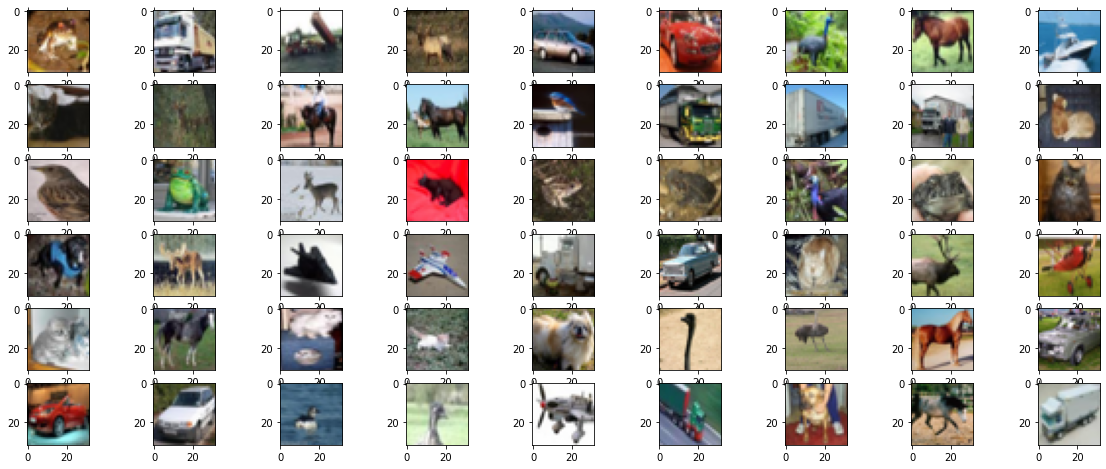

Test images


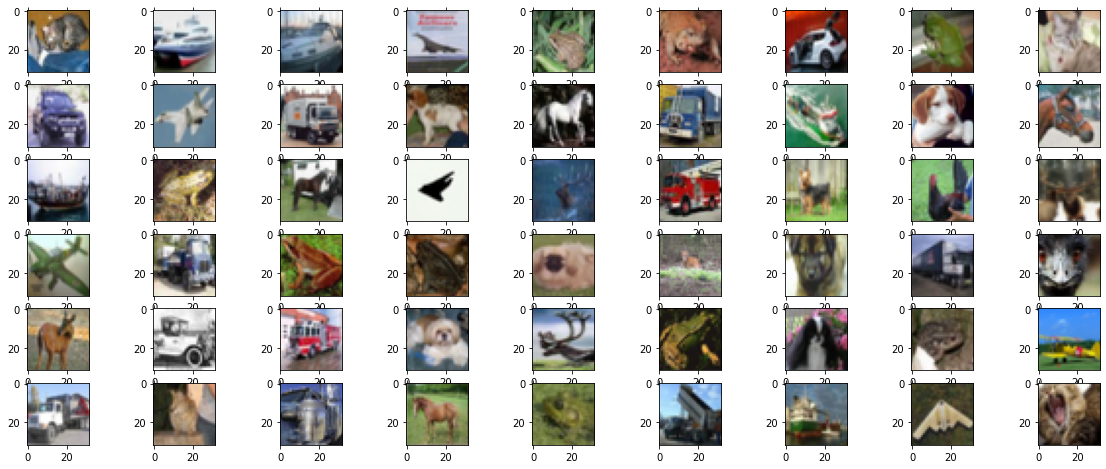

In [4]:
print("Training images")
plot_images(x_train[:54])
print("Test images")
plot_images(x_test[:54])

# Split data to train, test and verification datasets

In [5]:
#Split the test data to test set and verification set
x_test, x_validate, y_test, y_validate = train_test_split(x_test, y_test, test_size=0.2, random_state=12345,)

# Manipulate the images in data sets
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
x_validate = x_validate.reshape(-1, 32, 32, 3)

# Print the data set dimensions
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))
print('y train shape: {}'.format(y_train.shape))

x_train shape: (50000, 32, 32, 3)
x_test shape: (8000, 32, 32, 3)
x_validate shape: (2000, 32, 32, 3)
y train shape: (50000, 1)


# Define Sequential Convolutional Neural Network with 3 hidden layers

In [6]:
# Defining Sequential Convolutional Neural Network with 3 hidden layers

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Train the model and plot the train and test accuracies

In [8]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 349s 447ms/step - loss: 1.5588 - accuracy: 0.4267 - val_loss: 1.2081 - val_accuracy: 0.5642
Epoch 2/10
782/782 [==============================] - 350s 448ms/step - loss: 1.1489 - accuracy: 0.5918 - val_loss: 0.9559 - val_accuracy: 0.6593
Epoch 3/10
782/782 [==============================] - 351s 449ms/step - loss: 0.9790 - accuracy: 0.6562 - val_loss: 0.9234 - val_accuracy: 0.6681
Epoch 4/10
782/782 [==============================] - 348s 446ms/step - loss: 0.8794 - accuracy: 0.6941 - val_loss: 0.8103 - val_accuracy: 0.7156
Epoch 5/10
782/782 [==============================] - 349s 446ms/step - loss: 0.8134 - accuracy: 0.7161 - val_loss: 0.8062 - val_accuracy: 0.7210
Epoch 6/10
782/782 [==============================] - 351s 449ms/step - loss: 0.7558 - accuracy: 0.7370 - val_loss: 0.7404 - val_accuracy: 0.7421
Epoch 7/10
782/782 [==============================] - 353s 451ms/step - loss: 0.7019 - accuracy: 0.7559 - val_loss: 0.7688 -

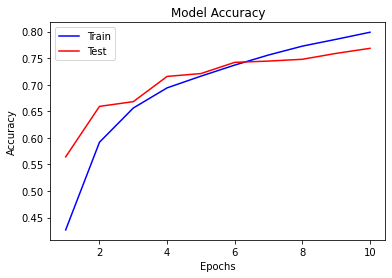

In [9]:
# Plots the model accuracy and validation accuracy
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'], 'b')
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'], 'r')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Verify the model

In [10]:
# Evaluate the model on validation data set
score = model.evaluate(x_validate, y_validate, verbose=1)

# Print test accuracy and loss
print('\n', 'Test accuracy on verification data set:', score[1])
print('\n', 'Loss: {:.4f}'.format(score[0]))


63/63 [==============================] - 4s 58ms/step - loss: 0.6114 - accuracy: 0.7935

 Test accuracy on verification data set: 0.7935000061988831

 Loss: 0.6114


In [0]:
# Defines the confusion matrix

import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

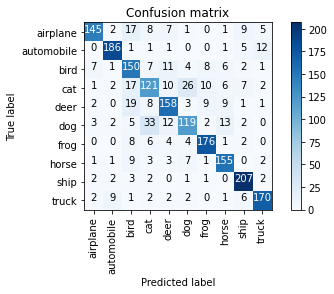

In [12]:
#Predict the values from the validation dataset
Y_pred = model.predict(x_validate)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = y_validate

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])


In [0]:
# Search and save first 6 incorrect validations to array

incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Some wrongly classified pics


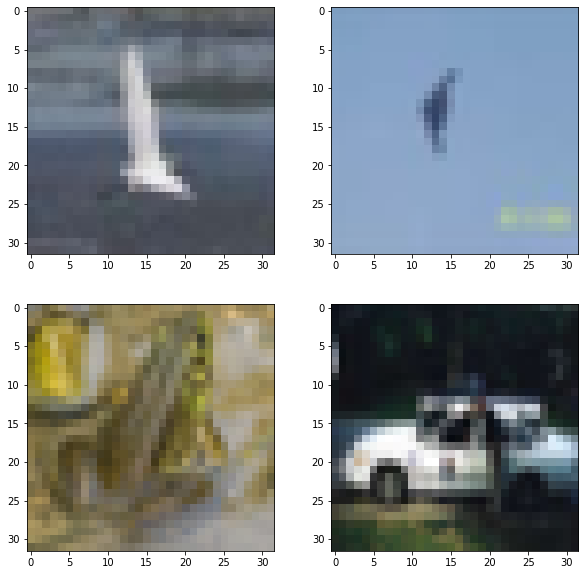

In [17]:
# Plot four first wrongly classified images 
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_validate[incorrect[0]])
ax[0,1].imshow(x_validate[incorrect[1]])
ax[1,0].imshow(x_validate[incorrect[2]])
ax[1,1].imshow(x_validate[incorrect[3]])
print('Some wrongly classified pics')

In [18]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


# Validate the model with individual photos

In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [0]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [0]:
#Helper
def numbers_to_strings(arg): 
    switcher = { 
        0: 'airplane', 
        1: 'automobile', 
        2: 'bird',
        3: 'cat', 
        4: 'deer', 
        5: 'dog', 
        6: 'frog', 
        7: 'horse', 
        8: 'ship',
        9: 'truck'   
    } 
    return switcher.get(arg, "nothing") 

In [0]:
#Loads the dataset from GitHub and unzips to content/flickr674_CIRAF_10 folder

import requests, zipfile, io

r = requests.get( 'https://github.com/val0tus/Machine-Learning/blob/master/flickr674_CIRAF_10.zip?raw=true' ) 
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [26]:
import os
from google.colab import files

# This can be used to upload photos from your own computer -- photos must be 32*32 pixels png files
#uploaded = files.upload()
#!ls
#os.getcwd()

# You can select any photo from dataset
img = load_image('/content/flickr674_CIRAF_10/8_ship-22.png')

result = model.predict_classes(img)
print(numbers_to_strings(result[0]))

ship


# Validate the model with Flickr dataset

In [0]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

In [0]:
# load and prepare the image
def load_image_2(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	img = img.reshape(32, 32, 3)
	img = img.astype('float32')
	img = img / 255.0
	return img

Working with 673 images
Image examples: 
8_ship-81.png


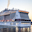

7_horse-49.png


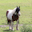

7_horse-19.png


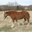

4_deer-20.png


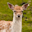

2_bird-28.png


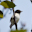

In [29]:
folder = "/content/flickr674_CIRAF_10/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(0, 5):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=100, height=100))

In [30]:
val_files = [] # x
y_val_2 = [] # y
i=0
for _file in onlyfiles:
    val_files.append(_file)
    label_in_file = _file.find("_")
    y_val_2.append(int(_file[0:label_in_file]))
    
print("Files in val_files: %d" % len(val_files))

Files in val_files: 673


In [0]:
dataset = np.ndarray(shape=(len(y_val_2), 32, 32, 3),dtype=np.float32)

i = 0
for _file in val_files:
    img = load_image_2(folder + "/" + _file) 
    dataset[i] = img
    i += 1

In [0]:
y_val_2 = np.asarray(y_val_2)

In [36]:
score_2 = model.evaluate(dataset, y_val_2, verbose=1)

# Print test accuracy and loss
print('\n', 'Test accuracy on validation data set:', score_2[1])
print('\n', 'Loss: {:.4f}'.format(score_2[0]))


22/22 [==============================] - 1s 55ms/step - loss: 0.8955 - accuracy: 0.7266

 Test accuracy on validation data set: 0.7265973091125488

 Loss: 0.8955


Conclusions:  
Test accuracy on verification data set: 0.7935000061988831

Loss: 0.6114

Test accuracy on Flickr validation data set: 0.7265973091125488

Loss: 0.8955 